In [1]:
#!pip install gensim

#### Simple Word2Vec Model

In [2]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sentences = [['human', 'interface', 'computer'],
            ['survey', 'user', 'computer', 'system', 'response', 'time'],
            ['eps', 'user', 'interface', 'system'],
            ['system', 'human', 'system', 'eps'],
            ['user', 'response', 'time'],
            ['trees'],
            ['graph', 'trees'],
            ['graph', 'minors', 'trees'],
            ['graph', 'minors', 'survey']]

In [4]:
model = Word2Vec(sentences = sentences, min_count = 1, vector_size = 8)

In [5]:
model.wv['trees']

array([ 0.03595725,  0.01239842, -0.10356519, -0.11811022,  0.09139708,
        0.06337827,  0.08447117,  0.00953582], dtype=float32)

In [6]:
similarity_score_hm_cp = model.wv.similarity('human', 'computer')
print('Similarity Score of Human and Computer :', similarity_score_hm_cp)

Similarity Score of Human and Computer : -0.44009817


In [7]:
similar_words_comp = model.wv.most_similar('computer', topn = 5)
print('Top 5 Similar Words of Computer :')
similar_words_comp

Top 5 Similar Words of Computer :


[('minors', 0.5697376132011414),
 ('response', 0.455085813999176),
 ('graph', 0.29385602474212646),
 ('user', -0.01504569686949253),
 ('interface', -0.07110846042633057)]

#### Reducing Dimentions using PCA

In [8]:
lst = []
for word in model.wv.index_to_key:
    lst.append(model.wv[word])

In [9]:
pca = PCA(n_components = 2)

In [10]:
reduced = pca.fit_transform(lst)

In [11]:
reduced

array([[ 0.11434661,  0.15765952],
       [-0.040465  ,  0.03502328],
       [ 0.01832792, -0.2081702 ],
       [-0.07608456,  0.10132395],
       [-0.15705209, -0.07884491],
       [ 0.10875142, -0.10900879],
       [ 0.0737009 , -0.00775762],
       [-0.13889178,  0.06594011],
       [ 0.11764772,  0.02636249],
       [-0.17316243, -0.02966088],
       [ 0.02611917,  0.10031539],
       [ 0.1267621 , -0.05318235]])

#### Visualizing Vectors

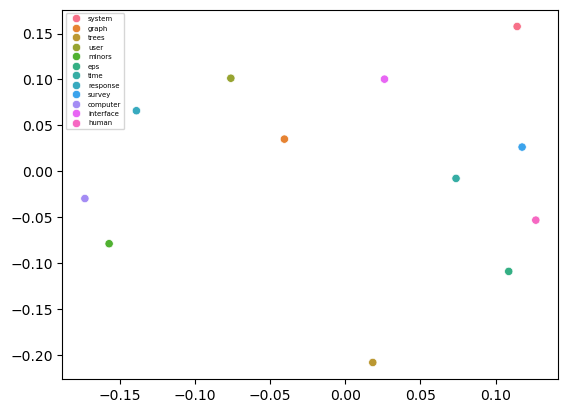

In [12]:
sns.scatterplot(x = reduced[:, 0], y = reduced[:, 1], hue = model.wv.index_to_key)
plt.legend(loc = 'upper left', fontsize = 5)
plt.show()